In [133]:
import seaborn as sns
import pandas as pd
import numpy as np

df=sns.load_dataset('penguins')

In [104]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [106]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

handle missing values

In [107]:
missing_percent=(df.isnull().sum()/len(df))*100
missing_percent

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

In [108]:
high_missing_cols=missing_percent[missing_percent>0.6]
high_missing_cols

sex    3.197674
dtype: float64

In [109]:
df.drop(columns=high_missing_cols.index,inplace=True)

In [110]:
num_cols=df.select_dtypes(include='number').columns
num_cols

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

lets analyze have outliers or not

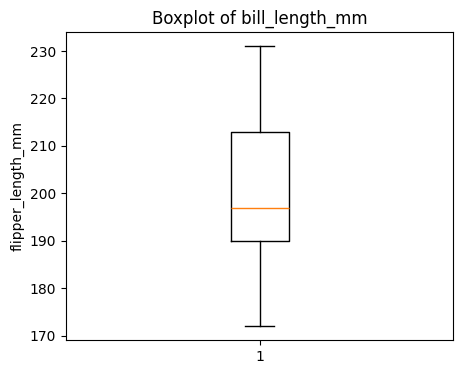

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.boxplot(df['flipper_length_mm'].dropna())
plt.ylabel('flipper_length_mm')
plt.title('Boxplot of bill_length_mm')
plt.show()


array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

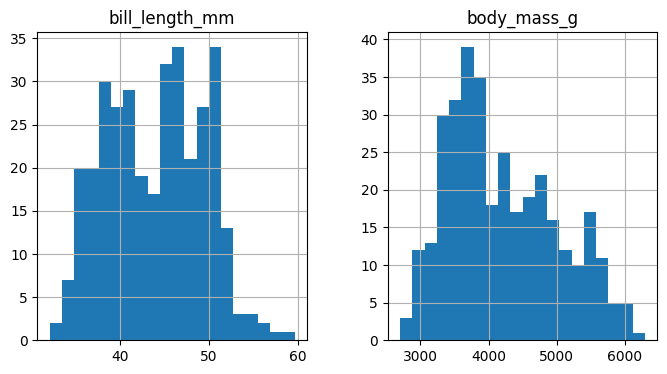

In [112]:
df[['bill_length_mm', 'body_mass_g']].hist(bins=20, figsize=(8,4))

we can notice that:

Bell-shaped or near-symmetric
No long tails.     

so better choice to handle is Mean()

In [113]:
df[num_cols]=df[num_cols].fillna(df[num_cols].mean())

In [114]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [115]:
"""df['sex'].isnull().sum()"""

"df['sex'].isnull().sum()"

In [116]:
"""df['sex'].value_counts(dropna=False)"""

"df['sex'].value_counts(dropna=False)"

In [117]:
"""df['sex'].fillna(df['sex'].mode()[0],inplace=True)"""

"df['sex'].fillna(df['sex'].mode()[0],inplace=True)"

In [118]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

Feature Scaling

In [119]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df[num_cols]=scaler.fit_transform(df[num_cols])

In [120]:
df[num_cols].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02
mean,-1.156697e-15,4.131062e-16,-8.262125e-16,4.131062e-17
std,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00
min,-2.174858e+00,-2.060444e+00,-2.065333e+00,-1.880837e+00
25%,-8.548868e-01,-7.889322e-01,-7.796428e-01,-8.162745e-01
50%,6.035444e-02,7.569585e-02,-2.796522e-01,-1.900612e-01
75%,8.422188e-01,7.877425e-01,8.631834e-01,6.866374e-01
max,2.884265e+00,2.211836e+00,2.148873e+00,2.627899e+00


In [129]:
df['bill_length_mm'].isnull().sum()

np.int64(0)

In [131]:
df['flipper_length_mm'].isnull().sum()

np.int64(0)

In [139]:
df['flipper_length_mm'].replace(0,np.nan,inplace=True)

C:\Users\Fathimathulmina ch\AppData\Local\Temp\ipykernel_4896\1016796056.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['flipper_length_mm'].replace(0,np.nan,inplace=True)


In [ ]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
mass_per_flipper      2
dtype: int64

Feature Engneering

In [141]:
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(), inplace=True)


C:\Users\Fathimathulmina ch\AppData\Local\Temp\ipykernel_4896\4289091025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(), inplace=True)


In [142]:
df['mass_per_flipper'] = df['body_mass_g'] / df['flipper_length_mm']


In [144]:
df['bill_ratio'] = df['bill_length_mm'] / df['bill_depth_mm']


In [145]:
df['mass_per_flipper']=df['body_mass_g']/df['flipper_length_mm']

In [146]:
df['mass_per_flipper'].replace([np.inf, -np.inf], np.nan).isna().sum()



np.int64(2)

In [147]:
np.isfinite(df[['mass_per_flipper']]).all()


mass_per_flipper    False
dtype: bool

5.2 : Encode Categorical Variables

In [123]:
df.select_dtypes(include='object').columns

Index(['species', 'island'], dtype='object')

5.2.1 One hot Encoding

In [124]:
df=pd.get_dummies(
    df,
    columns=['island'],
    drop_first=True
)

In [125]:
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_ratio,mass_per_flipper,island_Dream,island_Torgersen
0,Adelie,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,-1.126106,0.397746,False,True
1,Adelie,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,-6.427920,0.472302,False,True
2,Adelie,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,-1.543410,2.821263,False,True
3,Adelie,-1.307172e-15,1.806927e-15,0.000000,0.000000,-0.723423,NaN,False,True
4,Adelie,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,-1.215663,1.665338,False,True
...,...,...,...,...,...,...,...,...,...
339,Gentoo,-1.307172e-15,1.806927e-15,0.000000,0.000000,-0.723423,NaN,False,False
340,Gentoo,5.294731e-01,-1.450118e+00,1.006038,0.811880,-0.365124,0.807007,False,False
341,Gentoo,1.191758e+00,-7.380718e-01,1.506028,1.939064,-1.614692,1.287535,False,False
342,Gentoo,2.351241e-01,-1.195816e+00,0.791756,1.250229,-0.196622,1.579059,False,False


5.2.2 Label Encoding : there is nor ordinal data , so we cannot do thus label encoding

6. Feature selection

In [126]:
df.isnull().sum()

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
bill_ratio           0
mass_per_flipper     2
island_Dream         0
island_Torgersen     0
dtype: int64

In [127]:
X=df.drop('species',axis=1)
y=df['species']

In [128]:
X.isna().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
bill_ratio           0
mass_per_flipper     2
island_Dream         0
island_Torgersen     0
dtype: int64